<a href="https://www.kaggle.com/code/henilj7/decision-tree-iphone-record?scriptVersionId=103003277" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iphone-purchase-records/iphone_purchase_records.csv


In [2]:
#import Useful Library
import pandas as pd
import numpy as np

#for making graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("../input/iphone-purchase-records/iphone_purchase_records.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [6]:
df['Purchase Iphone'].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [7]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Purchase Iphone', ylabel='Salary'>

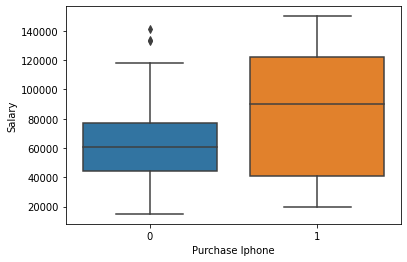

In [8]:
sns.boxplot( x='Purchase Iphone',y='Salary', data=df)

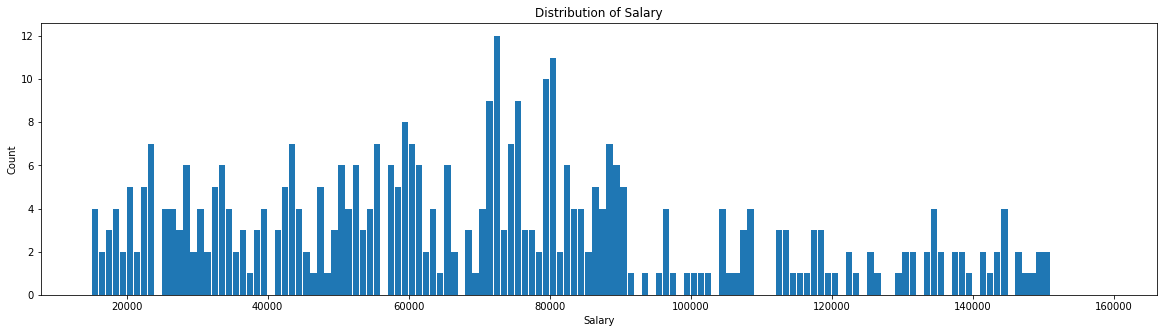

In [9]:
plt.figure(figsize=(20,5))
bins_size = np.arange(15000,150000+10000,1000)
plt.hist(x="Salary", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Salary');
plt.ylabel('Count');
plt.xlabel('Salary');

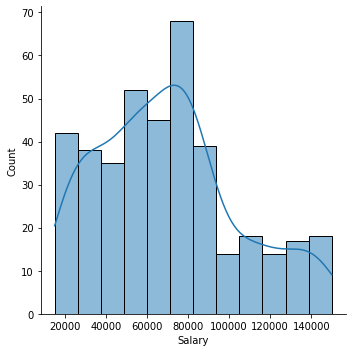

In [10]:
sns.displot(df, x="Salary", kde=True)

Most of the salary of highest income is between 70k to 80k

In [11]:
df.Salary.mean()

69742.5

Average Salary is 69742.5

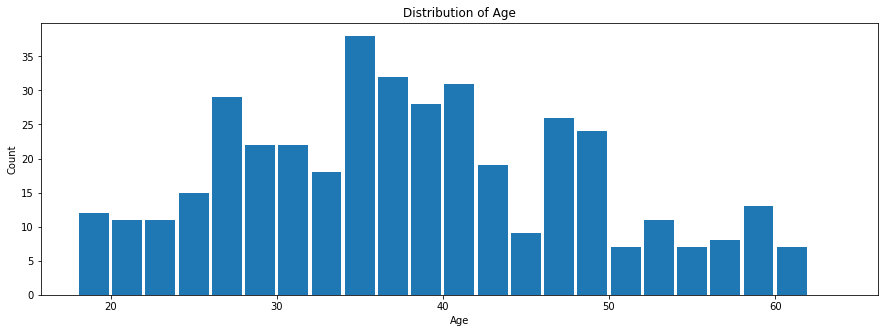

In [12]:
plt.figure(figsize=(15,5))
bins_size = np.arange(18,65,2)
plt.hist(x="Age", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Age');
plt.ylabel('Count');
plt.xlabel('Age');

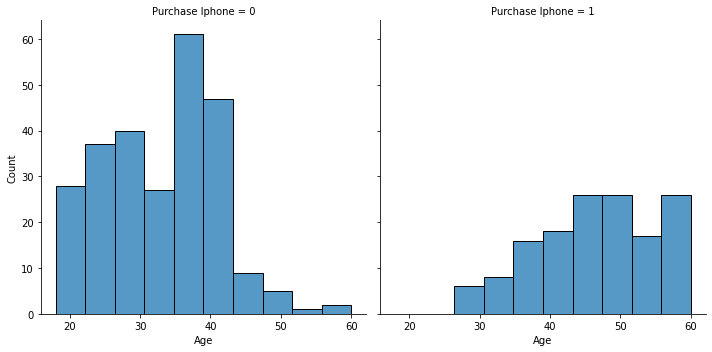

In [13]:
sns.displot(df, x="Age", col="Purchase Iphone")

Purchase Iphone=1 saw that most of the people who are older than 40 are purchase more

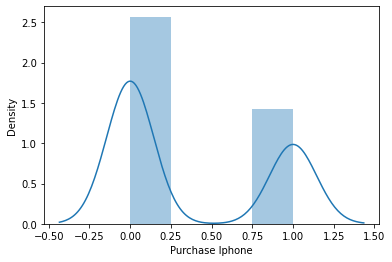

In [14]:
sns.distplot(df['Purchase Iphone']);

In [15]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [16]:
df.Age.unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54])

In [17]:
df.Age.nunique()

43

In [18]:
df.Salary.nunique()

117

In [19]:
df['Purchase Iphone'].unique()

array([0, 1])

Coorelation Heatmap

(4.0, 0.0)

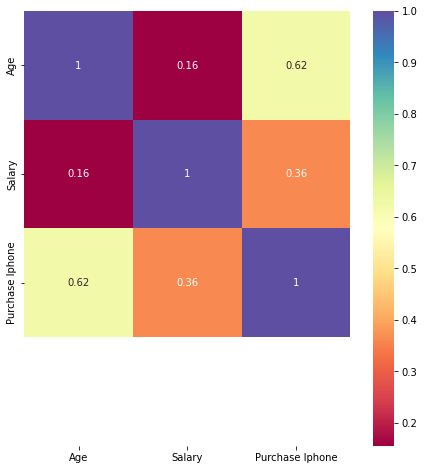

In [20]:
plt.figure(figsize =(8,8))
ax= sns.heatmap(df.corr(),square = True, annot = True,cmap= 'Spectral' )
ax.set_ylim(4.0, 0)

Regression Plot

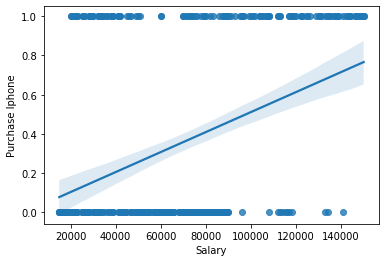

In [21]:
rpps = sns.regplot(x="Salary", y="Purchase Iphone", data=df)

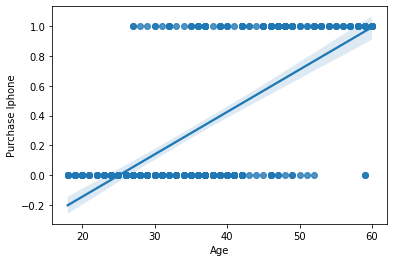

In [22]:
rpap = sns.regplot(x="Age", y="Purchase Iphone", data=df)

In [23]:
col = sns.color_palette("ch:s=.25,rot=-.25")[0]

<AxesSubplot:xlabel='Purchase Iphone', ylabel='Salary'>

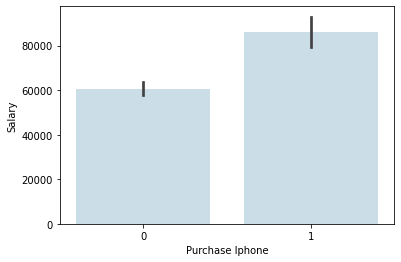

In [24]:
sns.barplot(x="Purchase Iphone", y="Salary", data=df, color=col)

By this bar plot we can take the idea that the person who purchased the product have more salary then the average

<AxesSubplot:xlabel='Purchase Iphone', ylabel='Salary'>

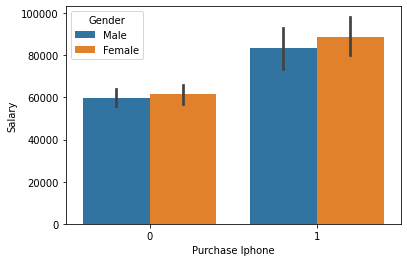

In [25]:
sns.barplot(x="Purchase Iphone", y="Salary",hue='Gender', data=df)

females have higher average salary and they purchased more as compare to male

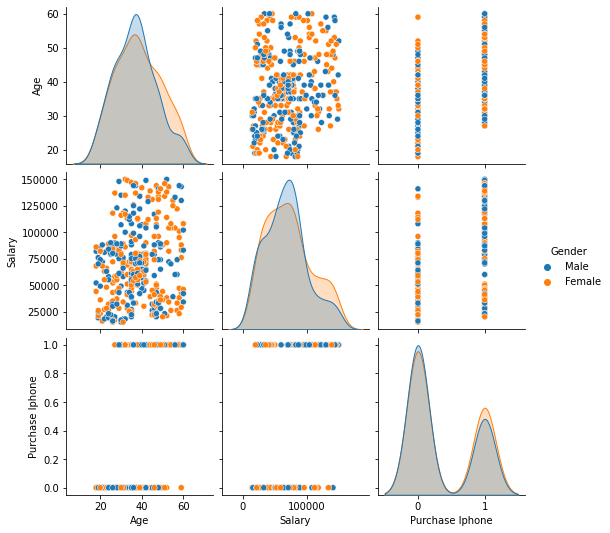

In [26]:
sns.pairplot(df, vars=["Age", "Salary","Purchase Iphone"], hue = "Gender")

drop duplicate


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(380, 4)

In [29]:
a = df.groupby(['Gender', 'Age'])
a.first(5)

Salary  Purchase Iphone
Gender Age                         
Female 18    44000                0
       19    21000                0
       20    23000                0
       21    16000                0
       22    63000                0
...            ...              ...
Male   56   133000                1
       57    74000                1
       58   144000                1
       59   143000                1
       60   102000                1

[83 rows x 2 columns]

In [30]:
a = df.groupby(['Purchase Iphone','Salary'])
a.first()

Gender  Age
Purchase Iphone Salary             
0               15000     Male   30
                16000   Female   21
                17000   Female   27
                18000     Male   32
                19000     Male   19
...                        ...  ...
1               146000  Female   51
                147000  Female   35
                148000    Male   29
                149000  Female   33
                150000  Female   32

[166 rows x 2 columns]

<AxesSubplot:xlabel='Age', ylabel='Salary'>

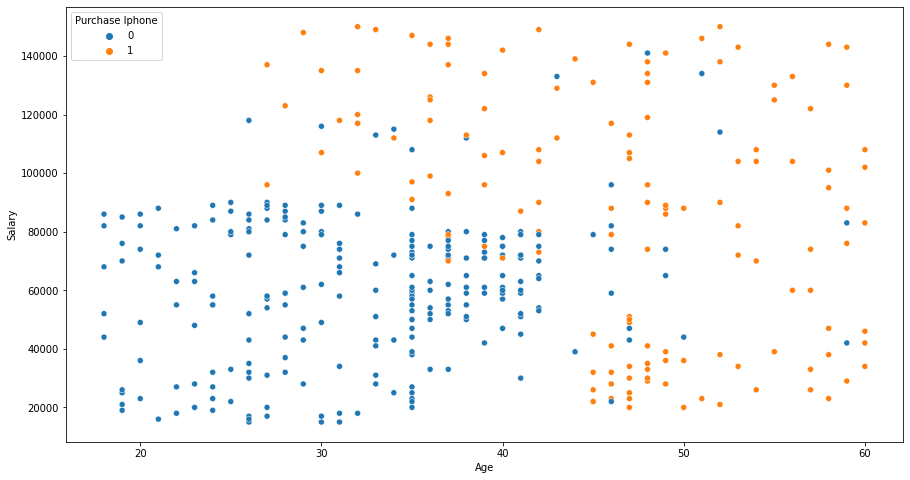

In [31]:
plt.figure(figsize = (15,8))
sns.scatterplot(y="Salary", x="Age", data=df, hue = 'Purchase Iphone')

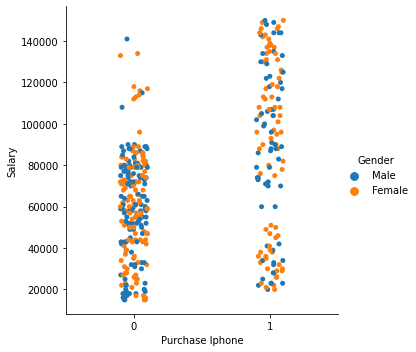

In [32]:
sns.catplot(y="Salary", x="Purchase Iphone", data=df, hue = 'Gender')

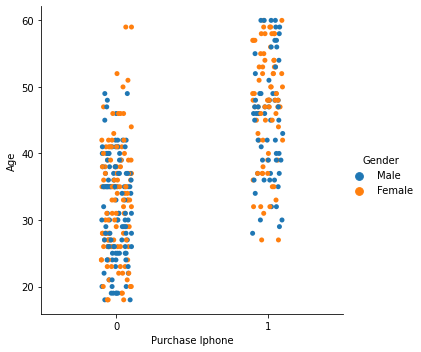

In [33]:
sns.catplot(y="Age", x="Purchase Iphone", data=df, hue = 'Gender')

Model Building

In [34]:
df.Gender.replace({'Male':1,
                   'Female':0}, inplace=True)

In [35]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [36]:
X = df.iloc[:, [1, 2]]
y = df.iloc[:, 3]

In [37]:
X

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


Decision Tree


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[56  7]
 [ 5 27]]


              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.79      0.84      0.82        32

    accuracy                           0.87        95
   macro avg       0.86      0.87      0.86        95
weighted avg       0.88      0.87      0.87        95



 Try to Predict the target with maximum independent features

In [41]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [42]:
X1 = df.iloc[:,0: 3]
y1 = df.iloc[:, 3]

In [43]:
X1

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

In [45]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [46]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[68  6]
 [13 27]]


              precision    recall  f1-score   support

           0       0.84      0.92      0.88        74
           1       0.82      0.68      0.74        40

    accuracy                           0.83       114
   macro avg       0.83      0.80      0.81       114
weighted avg       0.83      0.83      0.83       114

